In [14]:
import numpy as np
import matplotlib.pyplot as plt

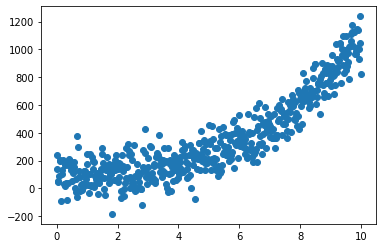

In [16]:
#generating a random data
x = np.linspace(0,10,500)
c = np.random.randn(500)
y = x**3 + c*100 + 100

plt.scatter(x,y)

In [8]:
x.Shape

(500,)

In [18]:
y.shape

(500,)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lg1 = LinearRegression()

In [21]:
# since our training data should be two dimensional

x1 = x.reshape(-1,1)

In [22]:
x1.shape

(500, 1)

In [23]:
#checking the dimensions
x1.ndim

2

Fitting the model

In [25]:
lg1.fit(x1,y)

LinearRegression()

In [26]:
pred1 = lg1.predict(x1)

In [27]:
from sklearn.metrics import r2_score

In [28]:
score = r2_score(y,pred1)

In [29]:
score = r2_score(y,pred1)

In [30]:
print(score)

0.7537190558994814


In [31]:
#since r2_score is not close to one so our model is not working perfect ly

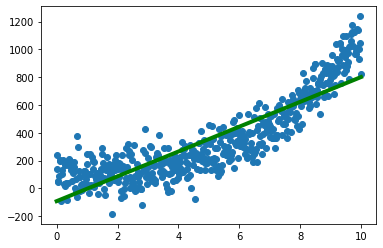

In [38]:
plt.scatter(x,y)
plt.plot(x,pred1,linewidth=4,color="green")

In [39]:
#let's use the polynomial regression

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
poly = PolynomialFeatures(degree=2)

In [43]:
poly_x = poly.fit_transform(x1)

In [45]:
poly_x.shape

(500, 3)

In [46]:
# 3 features because y = m1x1**2 + m2x1 + b

In [47]:
lg = LinearRegression()

In [49]:
lg.fit(poly_x,y)

LinearRegression()

In [50]:
pred = lg.predict(poly_x)

In [51]:
score2 = r2_score(y,pred)
print(score2)

0.8898977528512209


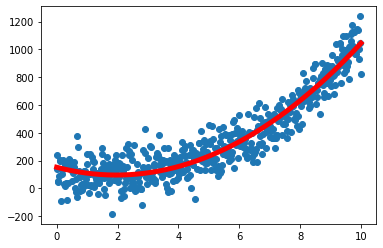

In [52]:
plt.scatter(x,y)
plt.plot(x,pred,linewidth=5,color="red")

In [53]:
#working in the housing dataset

In [54]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [55]:
boston = load_boston()

In [56]:
x = boston.data 
y = boston.target

In [59]:
from sklearn.model_selection import train_test_split

In [67]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=10)

In [61]:
xtrain

array([[8.87300e-02, 2.10000e+01, 5.64000e+00, ..., 1.68000e+01,
        3.95560e+02, 1.34500e+01],
       [1.35222e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.31420e+02, 1.33300e+01],
       [1.61282e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        2.48310e+02, 2.03400e+01],
       ...,
       [2.37857e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.70730e+02, 1.33400e+01],
       [1.69020e-01, 0.00000e+00, 2.56500e+01, ..., 1.91000e+01,
        3.85020e+02, 1.48100e+01],
       [7.61620e-01, 2.00000e+01, 3.97000e+00, ..., 1.30000e+01,
        3.92400e+02, 1.04500e+01]])

In [62]:
xtrain.shape

(404, 13)

In [63]:
ytrain.shape

(404,)

In [64]:
lg = LinearRegression()

In [65]:
lg.fit(xtrain,ytrain)

LinearRegression()

In [68]:
train_score = lg.score(xtrain,ytrain)
test_score = lg.score(xtest,ytest)

In [69]:
print(train_score)
print(test_score)

0.750121534530608
0.6709339839115631


In [70]:
# its an underfitting problem since the train and test score are both low

In [71]:
poly = PolynomialFeatures()

In [73]:
poly_train = poly.fit_transform(xtrain)
poly_test = poly.transform(xtest)

In [74]:
poly_train.shape

(404, 105)

In [75]:
lg = LinearRegression()

In [76]:
lg.fit(poly_train,ytrain)

LinearRegression()

In [77]:
training_score = lg.score(poly_train,ytrain)
testing_score = lg.score(poly_test,ytest)

In [78]:
print(training_score," ",testing_score)

0.9319230461477528   0.8749973786037257
